# Project Title: Instacart Orders Exploratory Data Analysis



# Project Description:
This project focuses on conducting an in-depth Exploratory Data Analysis (EDA) on Instacart's order data with the objective of extracting valuable insights into customer shopping behaviors. The analysis will encompass several key aspects, including identifying the most prevalent time of day for grocery shopping, examining the distribution of orders across days of the week, assessing the proportion of reordered products for individual customers, and determining the top 20 items that customers add to their carts first.



In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
products = pd.read_csv('/datasets/products.csv', sep=';')

In [4]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [5]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [6]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')


In [7]:
orders.info(show_counts=True)
print()
products.info(show_counts=True)
print()
aisles.info(show_counts=True)
print()
departments.info(show_counts=True)
print()
order_products.info(show_counts=True)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage

### `orders` data frame

In [8]:
# Check for duplicated orders
duplicated_orders = orders.duplicated().sum()


print(duplicated_orders)




15


In [9]:
# Check for all orders placed Wednesday at 2:00 AM

wednesday_2am_orders = orders[
    
   (orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)
]

display(wednesday_2am_orders)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [10]:
# Remove duplicate orders
orders= orders.drop_duplicates()
display(orders)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [11]:
# Double check for duplicate rows
print(orders.duplicated().sum())

0


In [12]:
# Double check for duplicate order IDs only

duplicate_order_ids = orders.duplicated(subset='order_id', keep=False)
print(orders[duplicate_order_ids])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


I used the duplicated funtion to check the duplicates in the DataFrame and by usind drop_duplicates to remove those. I made sure that duplicate orders have been removed by double checking. Finally, I made sure to use keep=False argument because it ensures that all occurrences of duplicate order IDs are marked as True in the boolean series. Then,   duplicate_order_ids filters the 'orders' data frame to include only those rows that have duplicate order IDs. Duplicate data can lead to inaccurate analysis and insights. When data is duplicated, it artificially inflates the importance of certain values, which can skew statistical measures and lead to incorrect conclusions.

### `products` data frame

In [13]:
# Check for fully duplicate rows
duplicated_products= products.duplicated().sum()
print(duplicated_products)

0


In [14]:
# Check for just duplicate product IDs
duplicate_product_ids = products.duplicated(subset='product_id', keep=False)
print(products[duplicate_product_ids])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
duplicated_product_name= products.duplicated(subset='product_name', keep=False)

display(products[duplicated_product_name])

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,fresh scent dishwasher detergent with dawn,74,17
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [16]:
# Check for duplicate product names that aren't missing

duplicate_products_not_missing = products[products['product_name'].duplicated(keep=False) & ~products['product_name'].isna()]

display(duplicate_products_not_missing)


,product_id,product_name,aisle_id,department_id
41,42,biotin 1000 mcg,47,11
185,186,fresh scent dishwasher detergent with dawn,74,17
515,516,american cheese slices,21,16
1538,1539,cauliflower head,83,4
1783,1784,nutrition protein mix blueberry nut,117,19
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


 Duplicate product entries can skew analysis results and affect statistical measures. Removing duplicates ensures that each product is represented only once, providing unbiased results during data analysis. I checked the duplicaate rows, duplicate product IDs, and product name to see the duplicate information. since there is none, I checked the product name that are not missing by calling notna() function.

### `departments` data frame

In [17]:
duplicates_departments= departments.duplicated().sum()
print(duplicates_departments)

0


In [18]:
# Double check for any other tricky duplicates
tricky_duplicates = departments.duplicated(keep=False)
print(departments[tricky_duplicates])

Empty DataFrame
Columns: [department_id, department]
Index: []


Duplicate entries might occur due to data entry errors or data integration processes. Identifying these duplicates helps in identifying potential errors and rectifying them at the source.

### `aisles` data frame

In [19]:
duplicates_aisles= aisles.duplicated().sum()
print(duplicates_aisles)

0


In [20]:
# Double check for any other tricky duplicates
tricky_aisles_duplicate= aisles.duplicated(keep=False)
print(aisles[tricky_aisles_duplicate])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


 Standardizing the 'aisles' data frame involves ensuring that each aisle is uniquely represented. Checking for duplicates contributes to data standardization efforts.

### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
duplictated_order_products= order_products.duplicated().sum()
print(duplictated_order_products)


0


In [22]:
# Double check for any other tricky duplicates
tricky_order_products= order_products.duplicated(keep=False)
print(order_products[tricky_order_products])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


I simply checked for duplicates by calling duplicated function and checked the tricky duplictaes to avoid confusion and ensure that each order products is uniquely represented.

### `products` data frame

In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_mask = products['product_name'].isna()
aisles_missing_product_name = products.loc[missing_product_mask, 'aisle_id']
are_all_missing_products_from_aisle_100 = (aisles_missing_product_name == 100).all()
print(are_all_missing_products_from_aisle_100)

True


In [25]:
# Are all of the missing product names associated with department ID 21?
department_missing_product_name = products.loc[missing_product_mask, 'department_id']
are_all_missing_products_from_department_21 = (department_missing_product_name == 21).all()
print(are_all_missing_products_from_department_21)



True


In [26]:
# What is this ailse and department?
aisle_100_and_department_21_rows = products.loc[(products['aisle_id'] == 100) & (products['department_id'] == 21) , ['aisle_id', 'department_id']]
display(aisle_100_and_department_21_rows)


,aisle_id,department_id
37,100,21
71,100,21
109,100,21
296,100,21
416,100,21
...,...,...
49552,100,21
49574,100,21
49640,100,21
49663,100,21


In [27]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

display(products)


,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


The analysis reveals that all missing product names are associated with aisle ID 100 or department ID 21. After filling the missing product names with 'Unknown', the DataFrame has no more missing values in the 'product_name' column.

The DataFrame also provides a glimpse of products associated with department ID 21, where the aisle ID is 100. There are 1258 rows in the DataFrame.

After filling the missing product names with 'Unknown', the DataFrame is now complete and ready for further analysis.

### `orders` data frame

In [28]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [29]:
# Are there any missing values where it's not a customer's first order?


rows_with_missing_values_not_first_order = orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

print(rows_with_missing_values_not_first_order)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


The analysis shows that there are no missing values in the 'days_since_prior_order' column for orders that are not customer's first order meaning there are no misisng values where it's not a customer's first order.

### `order_products` data frame

In [30]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [31]:
# What are the min and max values in this column?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(min_value)
print(max_value)

1.0
64.0


In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(orders_with_missing_values)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# Do all orders with missing values have more than 64 products?
are_all_orders_with_missing_values_more_than_64_products = all(order_products[order_products['order_id'].isin(orders_with_missing_values)].groupby('order_id')['product_id'].count() > 64)
print(are_all_orders_with_missing_values_more_than_64_products)

True


In [34]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
display(order_products)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


All orders with missing values in the 'add_to_cart_order' column have more than 64 products.

To handle the missing values, they have been replaced with the value 999, and the 'add_to_cart_order' column has been converted to an integer type.

This summary provides an overview of the order_products DataFrame and includes details about the 'add_to_cart_order' column, missing values, and the steps taken to handle them.

### Verifying that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
unique_hours = orders['order_hour_of_day'].unique()
unique_days = orders['order_dow'].unique()
print(unique_hours)
print(unique_days)

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
[6 5 0 4 3 1 2]


In [36]:
hour_range_valid = all(hour in range(24) for hour in unique_hours)
day_range_valid = all(day in range(7) for day in unique_days)
print(hour_range_valid)
print(day_range_valid)


True
True


### What time of day do people shop for groceries?

The most common time of day people shop for groceries is at 10 o'clock.


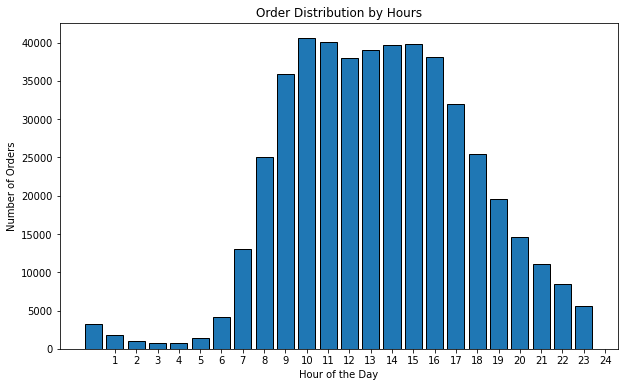

In [37]:
import matplotlib.pyplot as plt

hour_counts = orders['order_hour_of_day'].value_counts()

hour_counts = hour_counts.sort_index()

most_common_hour = hour_counts.idxmax()

print("The most common time of day people shop for groceries is at", most_common_hour, "o'clock.")
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 25))
plt.title('Order Distribution by Hours')
plt.show()


This code will count the occurrences of each hour in the 'order_hour_of_day' column, sort the results by the hour of the day, and then find the hour with the highest number of orders. The output will be the most common time of day people shop for groceries.

### What day of the week do people shop for groceries?

The most common day people shop for groceries is on 0


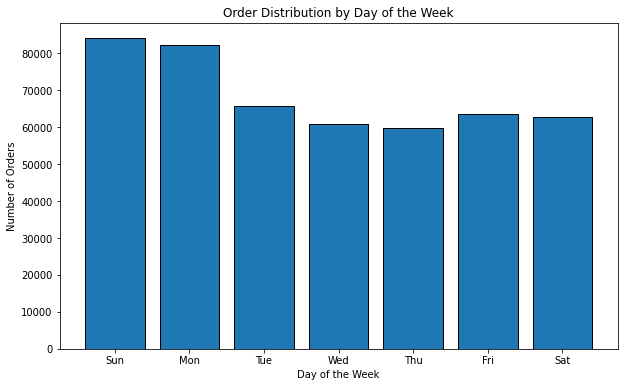

In [38]:
import matplotlib.pyplot as plt
order_day= orders['order_dow'].value_counts()
order_day=order_day.sort_index()
most_common_day = order_day.idxmax()
print("The most common day people shop for groceries is on", most_common_day )

days_of_week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

plt.figure(figsize=(10, 6))
plt.bar(days_of_week, order_day.values, edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Order Distribution by Day of the Week')
plt.show()

The most common day people shop for groceries is on 0 which represents Sunday. This code will also count the occurrences of each day of the week in the 'order_dow' column, sort the results by the day of the week, and then find the day with the highest number of orders. The output will be the most common day of the week people shop for groceries. 

### How long do people wait until placing another order?

Average days between orders: 11.101813900274362
Median days between orders: 7.0


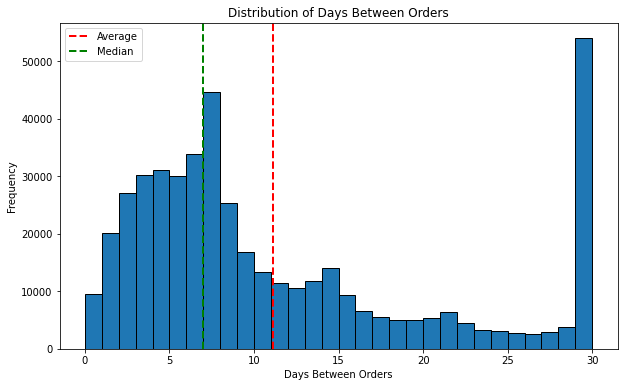

In [39]:


import matplotlib.pyplot as plt

average_days = orders['days_since_prior_order'].mean()
median_days = orders['days_since_prior_order'].median()

print("Average days between orders:", average_days)
print("Median days between orders:", median_days)


plt.figure(figsize=(10, 6))
plt.hist(orders['days_since_prior_order'], bins=30, edgecolor='black')
plt.xlabel('Days Between Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Days Between Orders')
plt.axvline(average_days, color='red', linestyle='dashed', linewidth=2, label='Average')
plt.axvline(median_days, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()

plt.show()





Using mean() calculates the average time between orders, which gives you an idea of the typical waiting time for most customers. It considers all the values in the column and calculates their sum, divided by the total number of non-missing values.

On the other hand, using median() calculates the middle value of the 'days_since_prior_order' column, which represents the value that separates the higher half from the lower half of the data. It is less sensitive to extreme values (outliers) and provides insight into the typical or typical central value of the waiting time between orders.



###  Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? 

In [40]:
import matplotlib.pyplot as plt

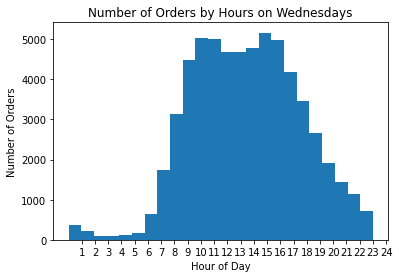

In [41]:
wednesday_orders = orders[orders['order_dow'] == 3]

wednesday_orders['order_hour_of_day'].plot(kind='hist',
                                          title='Number of Orders by Hours on Wednesdays',
                                          bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 25))

plt.show()


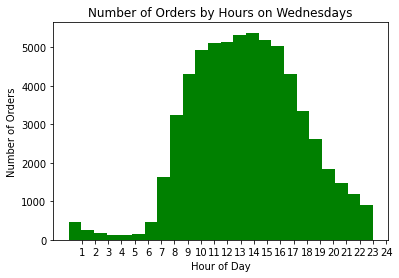

In [42]:
saturday_orders = orders[orders['order_dow'] == 6]
saturday_orders['order_hour_of_day'].plot(kind='hist',
                                          title='Number of Orders by Hours on Wednesdays',
                                          bins=24,
                                          color= 'green')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 25))
plt.show()



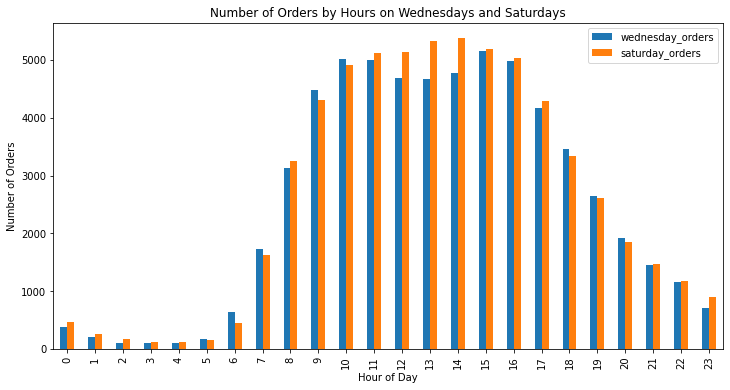

In [43]:
wednesday_data= orders[orders['order_dow']==3]['order_hour_of_day'].value_counts(sort=False)
saturday_data=orders[orders['order_dow']==6]['order_hour_of_day'].value_counts(sort = False)
concat_data = pd.concat([wednesday_data, saturday_data], axis = 'columns')
concat_data.columns = ['wednesday_orders', 'saturday_orders']
concat_data.plot (kind= 'bar',
                 y= ['wednesday_orders', 'saturday_orders'],
                 title= 'Number of Orders by Hours on Wednesdays and Saturdays',
                 xlabel ='Hour of Day',
                 ylabel= 'Number of Orders',
                 figsize = (12,6))
plt.legend(['wednesday_orders', 'saturday_orders'])
plt.show()

Here,The number of orders is higher in the morning and early afternoon on Saturdays compared to Wednesdays. Conversely, there might be more orders in the late afternoon and evening on Wednesdays. However, the specific differences will depend on the dataset and the shopping habits of customers on those days.

### The distribution for the number of orders per customer

In [44]:
import matplotlib.pyplot as plt

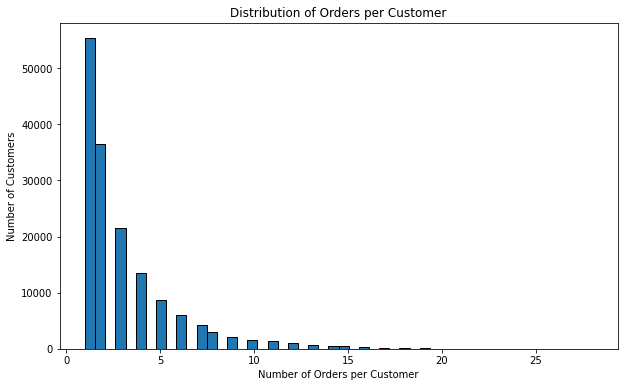

In [45]:
orders_per_customer = orders.groupby('user_id')['order_id'].count()  
orders_per_customer.plot(
    kind = 'hist',
    bins = 50,
    edgecolor = 'black',
    title = 'Distribution of Orders per Customer',
    figsize = (10, 6)
)
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.show()



The resulting histogram will show the distribution of the number of orders per customer. Each bar represents the number of customers who placed a specific number of orders. For example, if there are many bars on the left side of the histogram and a few on the right side, it indicates that most customers placed a small number of orders, and there are only a few customers who placed a large number of orders. Conversely, if the histogram is more evenly distributed, it suggests that the number of orders per customer is more spread out across the dataset.

### What are the top 20 popular products?

In [46]:
product_counts = order_products['product_id'].value_counts()

top_20_product_ids = product_counts.head(20).index

top_20_products = products[products['product_id'].isin(top_20_product_ids)]

display(top_20_products[['product_id', 'product_name']])

,product_id,product_name
5875,5876,organic lemon
8276,8277,apple honeycrisp organic
13175,13176,bag of organic bananas
16796,16797,strawberries
21136,21137,organic strawberries
21902,21903,organic baby spinach
22934,22935,organic yellow onion
24851,24852,banana
24963,24964,organic garlic
26208,26209,limes


First calculate the count of each product in the 'order_products' data frame using value_counts(). Then, extract the top 20 product IDs using head(20).index. Next, merge the product names from the 'products' data frame based on the top 20 product IDs using isin(). Finally, display the product IDs and names for the top 20 popular products.

### How many items do people typically buy in one order? What does the distribution look like?

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

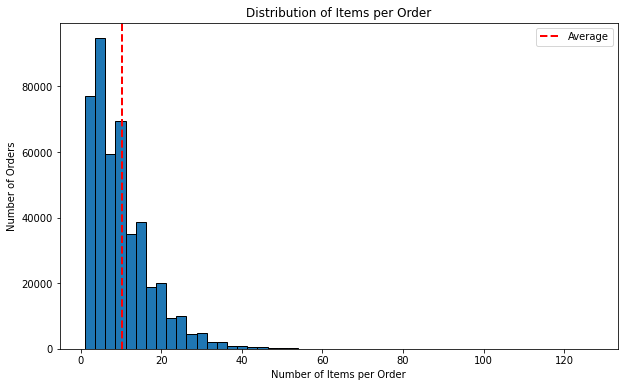

Average number of items per order: 10.098983215049127


In [48]:
items_per_order = order_products.groupby('order_id')['product_id'].count()

average_items_per_order = items_per_order.mean()


plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=50, edgecolor='black')
plt.axvline(average_items_per_order, color='red', linestyle='dashed', linewidth=2, label='Average')
plt.xlabel('Number of Items per Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Items per Order')
plt.legend()
plt.show()

print("Average number of items per order:", average_items_per_order)

It calculates and visualizes the distribution of the number of items per order. The output will be a histogram that shows the frequency of orders with a specific number of items. Additionally, a vertical red dashed line will indicate the average number of items per order.

### What are the top 20 items that are reordered most frequently?

In [49]:
reorder_frequency = order_products.groupby('product_id')['reordered'].mean()

top_20_reordered = reorder_frequency.sort_values(ascending=False).head(20)

top_20_reordered = pd.merge(top_20_reordered.reset_index(), products[['product_id', 'product_name']], on='product_id')

display(top_20_reordered[['product_id', 'product_name']])

,product_id,product_name
0,14721,bone strength take care
1,20949,vanilla sandwich cookies
2,6723,palmiers- petite
3,6732,naturally sparkling mineral water
4,45088,california dill pollen & garlic goat cheese & ...
5,45078,pomegranatea
6,21016,parchment lined 8 in x 3.75 in x 2.5 in pans
7,21005,peanut butter pie ice cream
8,35192,chocolate soy milk singles
9,35197,mocha chocolate chip organic non-dairy frozen...


In [50]:
top_20_reordered

,product_id,reordered,product_name
0,14721,1.0,bone strength take care
1,20949,1.0,vanilla sandwich cookies
2,6723,1.0,palmiers- petite
3,6732,1.0,naturally sparkling mineral water
4,45088,1.0,california dill pollen & garlic goat cheese & ...
5,45078,1.0,pomegranatea
6,21016,1.0,parchment lined 8 in x 3.75 in x 2.5 in pans
7,21005,1.0,peanut butter pie ice cream
8,35192,1.0,chocolate soy milk singles
9,35197,1.0,mocha chocolate chip organic non-dairy frozen...



To find the top 20 items that are reordered most frequently, we need to analyze the 'order_products' DataFrame, specifically the 'reordered' column. We'll group the DataFrame by 'product_id', calculate the mean of the 'reordered' column for each product, and then sort the products based on the mean in descending order to get the top 20 most frequently reordered items.

### For each product, what proportion of its orders are reorders?

In [51]:
reorder_proportion = order_products.groupby('product_id')['reordered'].mean()

reorder_proportion = pd.merge(reorder_proportion.reset_index(), products[['product_id', 'product_name']], on='product_id')

display(reorder_proportion[['product_id', 'product_name', 'reordered']])

,product_id,product_name,reordered
0,1,chocolate sandwich cookies,0.564286
1,2,all-seasons salt,0.000000
2,3,robust golden unsweetened oolong tea,0.738095
3,4,smart ones classic favorites mini rigatoni wit...,0.510204
4,7,pure coconut water with orange,0.500000
...,...,...,...
45568,49690,high performance energy drink,0.800000
45569,49691,original pancake & waffle mix,0.430556
45570,49692,organic instant oatmeal light maple brown sugar,0.416667
45571,49693,spring water body wash,0.440000


To calculate the proportion of reorders for each product, we need to group the 'order_products' DataFrame by 'product_id' and then calculate the mean of the 'reordered' column for each group. The mean of the 'reordered' column will give us the proportion of reorders for each product.

### For each customer, what proportion of their products ordered are reorders?

In [52]:
merged_data = pd.merge(order_products, orders[['order_id', 'user_id']], on='order_id')

total_products_per_customer = merged_data.groupby('user_id')['add_to_cart_order'].count().reset_index()
reordered_products_per_customer = merged_data.groupby('user_id')['reordered'].sum().reset_index()

customer_products = pd.merge(total_products_per_customer, reordered_products_per_customer, on='user_id')

customer_products['proportion_reordered'] = customer_products['reordered'] / customer_products['add_to_cart_order']

display(customer_products[['add_to_cart_order', 'reordered', 'proportion_reordered']])


,add_to_cart_order,reordered,proportion_reordered
0,26,1,0.038462
1,2,0,0.000000
2,12,8,0.666667
3,4,0,0.000000
4,14,13,0.928571
...,...,...,...
149621,27,6,0.222222
149622,21,15,0.714286
149623,46,41,0.891304
149624,125,87,0.696000


### What are the top 20 items that people put in their carts first? 

In [53]:

first_cart_orders = order_products[order_products['add_to_cart_order'] == 1]

first_cart_orders_grouped = first_cart_orders.groupby('product_id')['order_id'].min()

top_20_items_info = first_cart_orders_grouped.sort_values().head(20)

display(products.loc[top_20_items_info.index, ['product_id', 'product_name']])

,product_id,product_name
product_id,,
46842,46843,almond and shea butter moisturizing shampoo- f...
21405,21406,whole organic anise
30162,30163,spicy marinara sauce
42265,42266,vanilla almond african black soap
35430,35431,toasted onion brown rice snaps
48946,48947,pineapple upside-down cake mix
14129,14130,cinnabon cream cheese icing cinnamon rolls
7021,7022,charcoal briquets
43739,43740,sparkling probiotic drink coconut


In conclusion, this project demonstrates an in-depth Exploratory Data Analysis (EDA) on Instacart's order data and analyzes consumer shopping behaviors.
